<a href="https://colab.research.google.com/github/SSnehitha004/Satellite_image_segmentation_using_DL/blob/main/satellite_img_segm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip install patchify

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import random

In [4]:
# List contents of the directory
!ls -lah '/content/drive/MyDrive/archive (2)'

total 4.0K
drwx------ 2 root root 4.0K Mar 27 11:31 'Semantic segmentation dataset'


In [5]:
# Define the directory paths
new_ds= '/content/drive/MyDrive/archive (2)'
final_ds= 'Semantic segmentation dataset'

In [6]:
# Walk through the directory structure
for path,subdirs,files in os.walk(os.path.join(new_ds, final_ds)):
  dir_name= path.split(os.path.sep)[-1]
  print(dir_name)
  if  dir_name == 'masks':
    images = os.listdir(path)
    #print(images)
    for i, image_name in enumerate(images):
      if(image_name.endswith('.png')):
        #print(image_name)
        a = True

Semantic segmentation dataset
Tile 4
images
masks
Tile 6
masks
images
Tile 5
masks
images
Tile 8
images
masks
Tile 1
images
masks
Tile 2
masks
images
Tile 3
images
masks
Tile 7
images
masks


In [7]:
# Read an image
image= cv2.imread(f'{new_ds}/{final_ds}/Tile 2/images/image_part_001.jpg',1)

In [8]:
print(type(image))

<class 'numpy.ndarray'>


In [9]:
# Image patch size
image_patch_size = 256

In [10]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [11]:
# Convert image to PIL Image
type(Image.fromarray(image))

PIL.Image.Image

In [12]:
# Patchify the image
image_patches= patchify(image,(image_patch_size, image_patch_size, 3), step= image_patch_size )
print("length of image patches: ", len(image_patches))
image_patches

length of image patches:  2


array([[[[[[ 57,  72,  81],
           [ 50,  65,  74],
           [ 72,  84,  94],
           ...,
           [186, 186, 186],
           [224, 227, 225],
           [214, 215, 211]],

          [[ 53,  67,  79],
           [ 60,  75,  84],
           [ 82,  94, 106],
           ...,
           [148, 148, 148],
           [216, 217, 215],
           [202, 203, 201]],

          [[ 67,  78,  92],
           [101, 113, 125],
           [107, 116, 130],
           ...,
           [114, 114, 114],
           [221, 222, 220],
           [173, 174, 172]],

          ...,

          [[ 97,  98, 108],
           [ 72,  73,  83],
           [ 74,  74,  86],
           ...,
           [ 65,  66,  76],
           [ 70,  72,  83],
           [ 71,  71,  83]],

          [[ 92,  91, 100],
           [ 88,  90,  98],
           [ 95,  96, 106],
           ...,
           [ 74,  75,  85],
           [ 38,  40,  51],
           [  0,   0,  10]],

          [[ 86,  86,  92],
           [ 79,  79,  85]

In [13]:
# Data preprocessing
image_x= image_patches[0,0,:,:]
min_max= MinMaxScaler()
image_y= min_max.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
image_y

array([[[[0.22352941, 0.28235294, 0.31764706],
         [0.19607843, 0.25490196, 0.29019608],
         [0.28235294, 0.32941176, 0.36862745],
         ...,
         [0.72941176, 0.72941176, 0.72941176],
         [0.87843137, 0.89019608, 0.88235294],
         [0.83921569, 0.84313725, 0.82745098]],

        [[0.20784314, 0.2627451 , 0.30980392],
         [0.23529412, 0.29411765, 0.32941176],
         [0.32156863, 0.36862745, 0.41568627],
         ...,
         [0.58039216, 0.58039216, 0.58039216],
         [0.84705882, 0.85098039, 0.84313725],
         [0.79215686, 0.79607843, 0.78823529]],

        [[0.2627451 , 0.30588235, 0.36078431],
         [0.39607843, 0.44313725, 0.49019608],
         [0.41960784, 0.45490196, 0.50980392],
         ...,
         [0.44705882, 0.44705882, 0.44705882],
         [0.86666667, 0.87058824, 0.8627451 ],
         [0.67843137, 0.68235294, 0.6745098 ]],

        ...,

        [[0.38039216, 0.38431373, 0.42352941],
         [0.28235294, 0.28627451, 0.3254902 ]

In [14]:
# Image dataset creation
image_dataset=[]
image_extension = 'jpg'
image_type= 'images'
# Loop through tiles and images
for tile_id in range(1,8):
  for image_id in range(1,20):
    image= cv2.imread(f'{new_ds}/{final_ds}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
    if image is not None:
      #print(image.shape)
      size_x= (image.shape[1]//image_patch_size)*image_patch_size
      size_y= (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0,size_x,size_y))
      #print("({}, {})".format(image.size[0],image.size[1]))
      image= np.array(image)
      ptchd_imgs= patchify(image,(image_patch_size, image_patch_size, 3), step= image_patch_size )
      #print(len(ptchd_imgs))
      for i in range(ptchd_imgs.shape[0]):
        for j in range(ptchd_imgs.shape[1]):
          indv_ptchd_img= ptchd_imgs[i,j,:,:]
         #print(indv_ptchd_img.shape)
          indv_ptchd_img= min_max.fit_transform(indv_ptchd_img.reshape(-1, indv_ptchd_img.shape[-1])).reshape(indv_ptchd_img.shape)
          indv_ptchd_img= indv_ptchd_img[0]
          #print(indv_ptchd_img.shape)
          image_dataset.append(indv_ptchd_img)

In [15]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{new_ds}/{final_ds}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = min_max.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [16]:
# Reshape datasets
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [17]:
# Print dataset lengths
print(len(image_dataset))
print(len(mask_dataset))

945
945


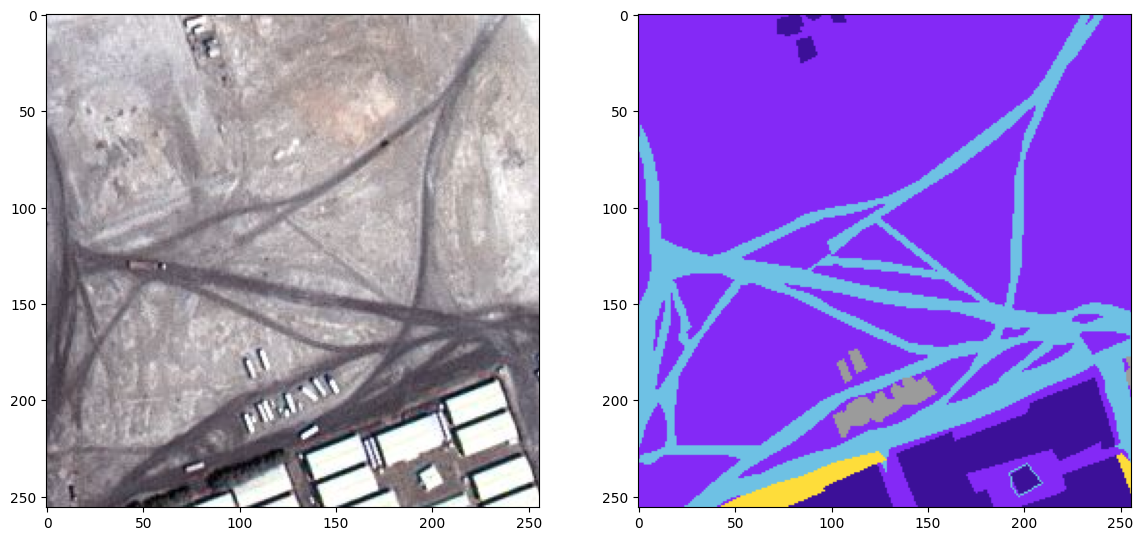

In [18]:
# Plot random images
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [19]:
class_building = '#3C1098'# Define class colors
class_building = class_building.lstrip('#')
# Convert class colors to arrays
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [20]:
label = individual_patched_mask
# Define label segmentation function
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [21]:
# Convert labels to categorical
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [22]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [23]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


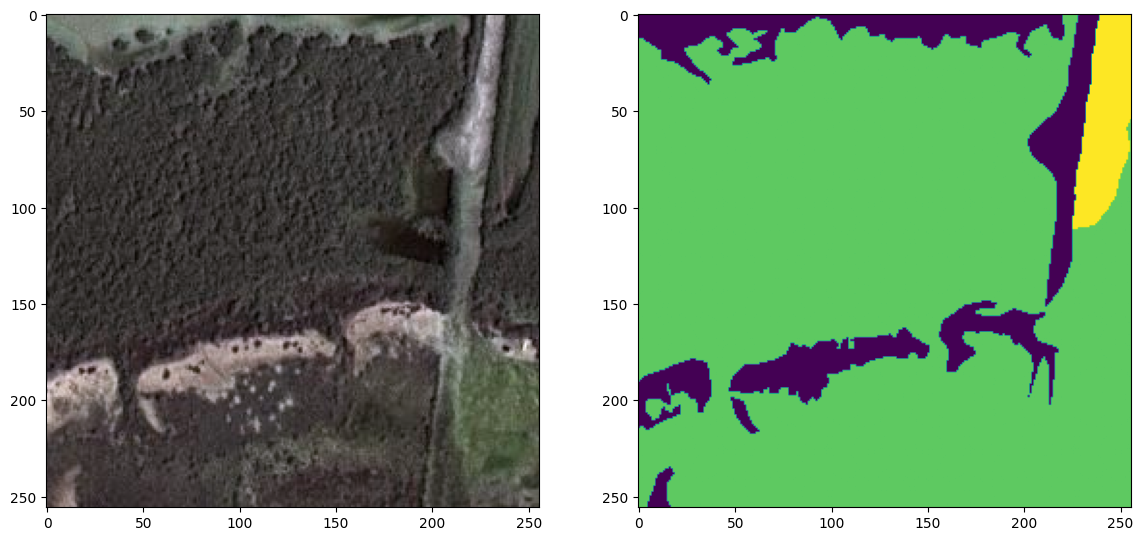

In [24]:
# Plot random images with labels
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [25]:
total_classes = len(np.unique(labels))
total_classes

6

In [26]:
# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)
# Prepare training dataset
master_trianing_dataset = image_dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [28]:
# Define image dimensions and channel
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [29]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [30]:
!pip install -U segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


In [31]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [32]:
from keras import backend as K

In [33]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [34]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [35]:
metrics = ["accuracy", jaccard_coef]

In [36]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [37]:
model = get_deep_learning_model()

In [38]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [39]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [40]:
## new changes
!pip install tensorflow>=2.0.0
!pip install "keras>=2.15.0,<2.16"
!pip install keras_applications==1.0.8
!pip install image-classifiers==1.0.0
!pip install efficientnet==1.0.0

!pip install -U segmentation-models==1.0.1

%env SM_FRAMEWORK=tf.keras

import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [41]:
import segmentation_models as sm
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [42]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [43]:
total_loss = dice_loss + (1 * focal_loss)

In [44]:
import tensorflow as tf
tf.keras.backend.clear_session()
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [45]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=50,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/50
51/51 [==============================] - 53s 397ms/step - loss: 1.0016 - accuracy: 0.5669 - jaccard_coef: 0.2652 - val_loss: 0.9936 - val_accuracy: 0.6170 - val_jaccard_coef: 0.2858
Epoch 2/50
51/51 [==============================] - 11s 209ms/step - loss: 0.9859 - accuracy: 0.6645 - jaccard_coef: 0.3430 - val_loss: 0.9728 - val_accuracy: 0.6747 - val_jaccard_coef: 0.3612
Epoch 3/50
51/51 [==============================] - 11s 208ms/step - loss: 0.9659 - accuracy: 0.7061 - jaccard_coef: 0.4325 - val_loss: 0.9736 - val_accuracy: 0.6833 - val_jaccard_coef: 0.4492
Epoch 4/50
51/51 [==============================] - 11s 215ms/step - loss: 0.9550 - accuracy: 0.7402 - jaccard_coef: 0.4944 - val_loss: 0.9774 - val_accuracy: 0.6853 - val_jaccard_coef: 0.4572
Epoch 5/50
51/51 [==============================] - 11s 212ms/step - loss: 0.9503 - accuracy: 0.7521 - jaccard_coef: 0.5119 - val_loss: 0.9655 - val_accuracy: 0.7109 - val_jaccard_coef: 0.4748
Epoch 6/50
51/51 [=================

In [46]:
history_a = model_history
history_a.history

{'loss': [1.0016180276870728,
  0.9859477877616882,
  0.9658643007278442,
  0.9549606442451477,
  0.9502967000007629,
  0.947019636631012,
  0.9435853958129883,
  0.9388455748558044,
  0.9333756566047668,
  0.9302072525024414,
  0.9309476017951965,
  0.9272007346153259,
  0.9250103831291199,
  0.9251939058303833,
  0.9218512177467346,
  0.9214518666267395,
  0.9195441603660583,
  0.9183951616287231,
  0.9170482754707336,
  0.9200332760810852,
  0.9164948463439941,
  0.9158493280410767,
  0.9166379570960999,
  0.9141716957092285,
  0.912319540977478,
  0.9117972254753113,
  0.9102466106414795,
  0.9100183844566345,
  0.9102885723114014,
  0.9087750911712646,
  0.9080036878585815,
  0.9064540266990662,
  0.915378212928772,
  0.9132002592086792,
  0.9083933234214783,
  0.9057738184928894,
  0.904983401298523,
  0.9040501713752747,
  0.9032977223396301,
  0.9034218788146973,
  0.9025313258171082,
  0.9013710021972656,
  0.9018228650093079,
  0.901685893535614,
  0.9008108973503113,
  0.899

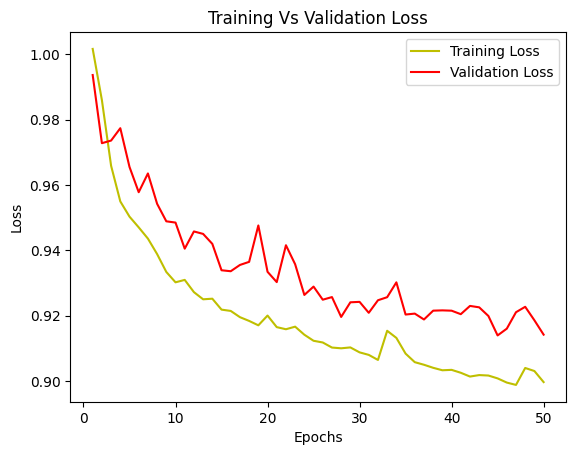

In [47]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

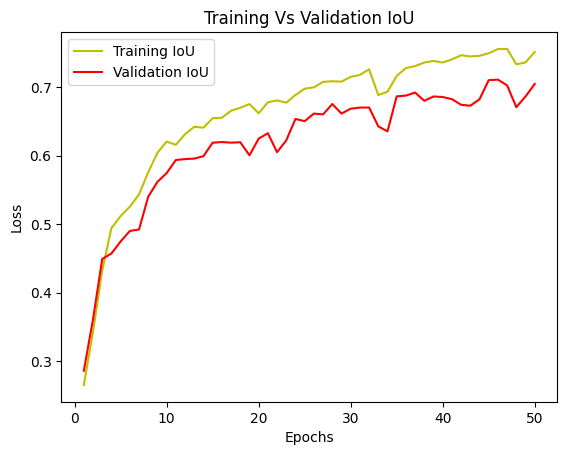

In [48]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [50]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 54ms/step


In [51]:
len(y_pred)
y_pred

array([[[[2.23280117e-02, 5.19504368e-01, 1.80637062e-01,
          1.78311780e-01, 7.30189979e-02, 2.61997879e-02],
         [4.40180814e-03, 5.67653120e-01, 1.43077239e-01,
          2.35501885e-01, 3.94214280e-02, 9.94448736e-03],
         [2.53326120e-03, 5.20667195e-01, 1.68852702e-01,
          2.65957147e-01, 3.47904190e-02, 7.19926786e-03],
         ...,
         [4.62528737e-03, 6.09850764e-01, 1.59311071e-01,
          1.66675985e-01, 5.19034192e-02, 7.63351563e-03],
         [6.43653702e-03, 5.79697907e-01, 1.44217685e-01,
          1.90100223e-01, 7.13145733e-02, 8.23312812e-03],
         [2.09641736e-02, 4.43176746e-01, 1.61530301e-01,
          2.28849486e-01, 1.24378443e-01, 2.11008303e-02]],

        [[6.15937496e-03, 6.76036119e-01, 1.20328009e-01,
          1.44079417e-01, 4.34869304e-02, 9.91011597e-03],
         [1.05435902e-03, 7.08498061e-01, 9.92478281e-02,
          1.75716147e-01, 1.32347243e-02, 2.24883039e-03],
         [3.77864722e-04, 6.21053040e-01, 1.3854

In [52]:
y_pred_argmax = np.argmax(y_pred, axis=3)
len(y_pred_argmax)
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 1, 1],
        [2, 2, 2, ..., 3, 1, 1],
        ...,
        [2, 2, 2, ..., 2, 1, 1],
        [2, 2, 2, ..., 2, 1, 1],
        [2, 2, 2, ..., 2, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [53]:
y_test_argmax = np.argmax(y_test, axis=3)
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [54]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 998ms/step


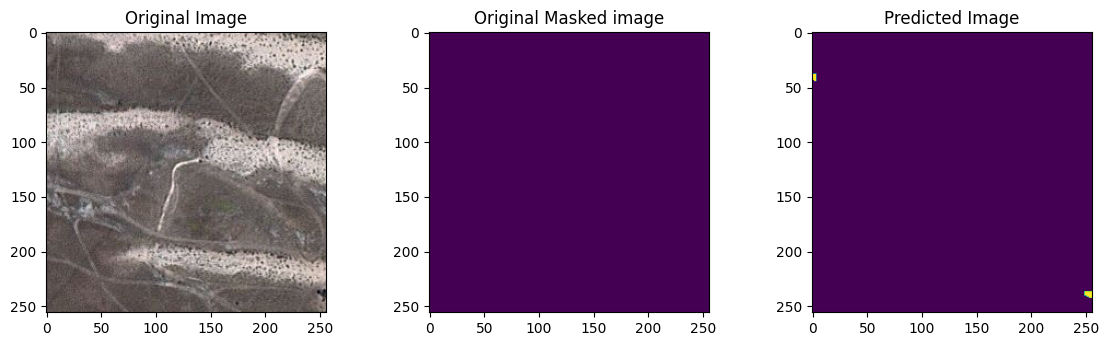

In [55]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [56]:
model.save("satellite_segmentation_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
